In [19]:
import overpy
import geopandas as gpd

In [10]:
api = overpy.Overpass()
r = api.query("""
area["ISO3166-1"="GB"][admin_level=2];
(
  nwr(area)["recycling_type"="centre"];
);
out center;
""")

In [16]:
len(r.nodes)

442

In [17]:
len(r.ways)

770

In [18]:
len(r.relations)

7

In [33]:
r.nodes[0]

<overpy.Node id=8890141 lat=52.5223900 lon=-1.7959729>

In [51]:
def node_to_feature(elem):
    return {
        "geometry": {
                "type": "Point",
                "coordinates": [elem.lon, elem.lat]
        },
        "id": elem.id,
        "properties": []
    }

In [52]:
features = [node_to_feature(elem) for elem in r.nodes]

gdf = gpd.GeoDataFrame.from_features(features)

<AxesSubplot:>

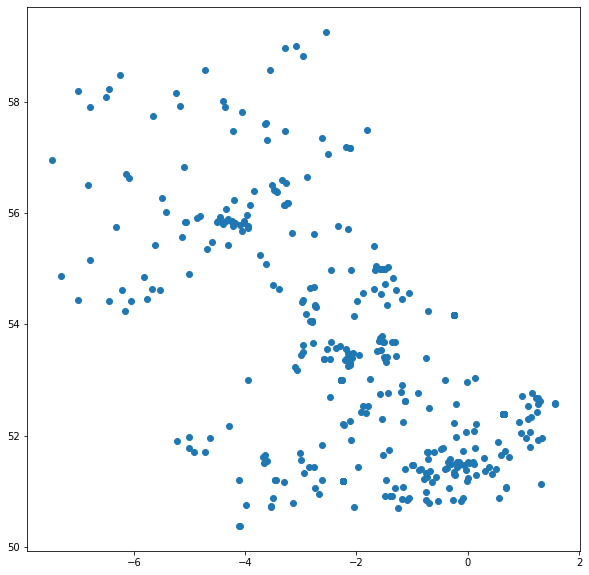

In [54]:
gdf.plot(figsize=(15, 10))

In [55]:
r.ways[0]

<overpy.Way id=4001161 nodes=[190602329, 20995246, 20995307, 190602325, 190602329]>

In [21]:
def elem_to_feature(elem):
    return {
        "geometry": {
                "type": "Polygon",
                "coordinates": [[[d.lon, d.lat]] for d in elem["geometry"]]]
        },
        "properties": elem["tags"],
    }

In [30]:
features = [elem_to_feature(elem) for elem in r.ways]

gdf = gpd.GeoDataFrame.from_features(features)

TypeError: 'Way' object is not subscriptable